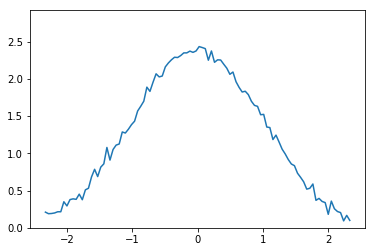

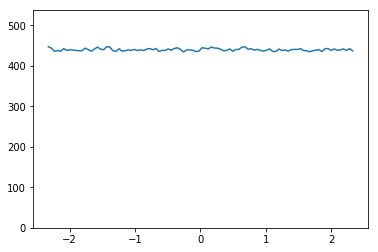

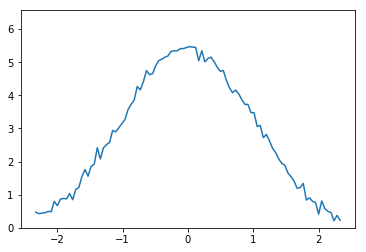

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
y_org = norm.pdf(x) * 6
y = []
for a in y_org:
    power = a + np.random.randn() * 0.05
    vol = 440 + np.random.randn() * 3
    elec = power / vol * 1000
    y.append([power, vol, elec])

columns = ["power", "vol", "elec"]
df = pd.DataFrame(y, columns=columns)

for column in columns:
    plt.plot(x, df[column])
    plt.ylim(0,df[column].max() * 1.2)
    plt.show()



In [3]:
from datetime import datetime
from datetime import timedelta
import pandas as pd

start = datetime.strptime('2018-09-01', '%Y-%m-%d')
# end   = datetime.strptime('2018-09-05', '%Y-%m-%d')
end = datetime.strptime('2018-09-10', '%Y-%m-%d')

# ids = ["PCS01-1-1", "PCS01-1-2", "PCS02-1-1", "PCS02-1-2"]
ids = ["PCS01-1-1", "PCS01-1-2"]


def daterange(_start, _end):
    for d in range((_end - _start).days):
        yield _start + timedelta(d)


    
def create_csv(id, dt):
    columns = ["dtm", "power", "vol", "elec"]
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 12 * 60)
    y = []

    for m, a in enumerate(norm.pdf(x)):
        dtm = dt + timedelta(hours=6, minutes=m)
        power = a * 6 + np.random.randn() * 0.05
        vol = 440 + np.random.randn() * 3
        elec = power / vol * 1000
        y.append([dtm, power, vol, elec])

    df = pd.DataFrame(y, columns=columns)
    df["id"] = id
    return df

data = []
for id in ids:
    for dt in daterange(start, end):
        print ("id is", id, "dt is", dt)
        data.append(create_csv(id, dt))

pd.concat(data).to_csv("out.tsv".format(dt.strftime('%Y%m%d'), id), header=None, index=False, sep="\t")
    


id is PCS01-1-1 dt is 2018-09-01 00:00:00
id is PCS01-1-1 dt is 2018-09-02 00:00:00
id is PCS01-1-1 dt is 2018-09-03 00:00:00
id is PCS01-1-1 dt is 2018-09-04 00:00:00
id is PCS01-1-1 dt is 2018-09-05 00:00:00
id is PCS01-1-1 dt is 2018-09-06 00:00:00
id is PCS01-1-1 dt is 2018-09-07 00:00:00
id is PCS01-1-1 dt is 2018-09-08 00:00:00
id is PCS01-1-1 dt is 2018-09-09 00:00:00
id is PCS01-1-2 dt is 2018-09-01 00:00:00
id is PCS01-1-2 dt is 2018-09-02 00:00:00
id is PCS01-1-2 dt is 2018-09-03 00:00:00
id is PCS01-1-2 dt is 2018-09-04 00:00:00
id is PCS01-1-2 dt is 2018-09-05 00:00:00
id is PCS01-1-2 dt is 2018-09-06 00:00:00
id is PCS01-1-2 dt is 2018-09-07 00:00:00
id is PCS01-1-2 dt is 2018-09-08 00:00:00
id is PCS01-1-2 dt is 2018-09-09 00:00:00
